<a href="https://colab.research.google.com/github/roanbrasil/aula-ia-modulo01/blob/main/day2_jornada_ia_fiap_empresas_bv_modulo1_FundamentosLLM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade matplotlib



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 63.6 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.0
    Uninstalling matplotlib-3.10.0:
      Successfully uninstalled matplotlib-3.10.0


In [2]:
!pip install -q transformers sentencepiece accelerate sacremoses gensim aif360 scikit-learn numpy matplotlib scipy torch pydantic lm-format-enforcer --extra-index-url https://download.pytorch.org/whl/cu121

# Fundamentos de LLMs e Engenharia de Contexto — Aula Completa (4h)

**Instrutor:** Roan Brasil Monteiro  
**Formato:** Teoria → Código (linha a linha) → Exercícios → Respostas  
**Público:** Engenheiros(as) de Software / Arquitetos / Cientistas de Dados (nível avançado)  

---

**Tópicos:**  
- Funcionamento e **limitações** dos LLMs  
- **Prompt engineering** e **context window**  
- **Boas práticas** para **coerência** e **relevância**

> **Duração estimada**: ~4 horas (com prática e discussão). **duas pausas de  de 15 minutos as 10:30 horas e as 12 horas**



## Agenda (Sugerida)
1. Fundamentos e Funcionamento da LLM: previsão do próximo token, embeddings, atenção (self-attention).  
   - Teoria  
   - Exemplos Código
2. Limitações dos LLMs
   - Teoria   
   - Exemplos Código
3. Prompt Engineering, Context Window e orçamento de tokens.  
   - Teoria
   - Exemplos Código
4. Boas práticas de coerência e relevância.
   - Teoria  
   - Exemplos Código
5. Exercícios finais integrados


# 1) Fundamentos dos LLMs (Como funcionam)

### Visão geral
- LLMs são **modelos autoregressivos**: aprendem a **prever o próximo token** dado o histórico.  
- **Token**: unidade discreta (subpalavra/caractere).  
- **Embeddings**: vetores densos que representam tokens e posições (positional encodings).  
- **Self-attention**: distribui **pesos** sobre o contexto para compor a representação de cada posição.  
- Treinamento: maximização de log-likelihood (probabilidade) de sequências reais.



## Funcionamento dos LLM's

### Arquitetura Transformer: Attention is All You Need

O **Transformer** revolucionou o NLP após popularização da arquitetura ***seq2seq*** (criado em 2014 e  incorporado ao Google Translate em 2016).

 - **Seq2seq** utiliza **RNNs (Redes Neurais Recorrentes)** como codificador e decodificador
  - Entrada e saída sequências de tokens
  - **Codificador**: Processa tokens de entrada sequencialmente
  - **Decodificador**: Gera tokens de saída sequencialmente

  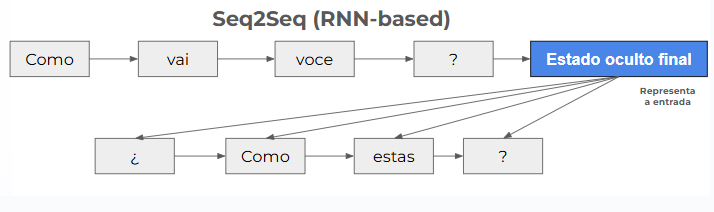




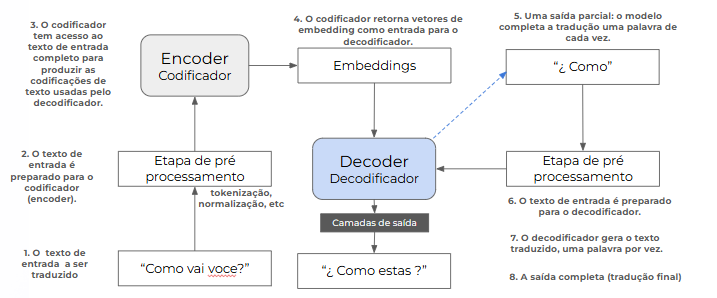

  A LLM baseado em Transformers:
  - 2 etapas:
    - Pré-preenchimento
    - Decodificar
  - Arquitetura possui 2 submódulos :
    - Codificador (**Encoder**)
    - Decodificador (**Decoder**)
  


## Tokenização de texto

**Tokenização** é o processo de transformar sequências em números, ou seja, é o processo de dividir texto em unidades menores chamadas **tokens**. LLMs não entendem texto diretamente - eles trabalham com números.

**Exemplo:**

**- GPT2Tokenizer**
  - Padrão GPT-2, apenas para a arquitetura GPT-2.
  - O usuário precisa saber qual tokenizador usar (ex: GPT-2).
  - Baseada em: BPE (Byte-Pair Encoding), padrão GPT-2.
  - Quando você sabe exatamente que quer o GPT-2.
  - *from transformers import GPT2Tokenizer*
  - *tokenizer = GPT2Tokenizer.from_pretrained("gpt2")*

**- AutoTokenizer**
  - É genérico — detecta o tokenizador correto automaticamente.
  - Detecta o tokenizador a partir do nome/id do modelo (ex: "Qwen/Qwen2-0.5B").
  - Pode ser BPE, SentencePiece, WordPiece etc., dependendo do modelo.
  - Quando quer algo genérico que funcione com qualquer modelo do Hugging Face Hub.
  - *from transformers import AutoTokenizer*
  - *tokenizer = AutoTokenizer.from_pretrained("gpt2")* (detecta automaticamente GPT-2 internamente) **ou;**
  - *tokenizer = AutoTokenizer.from_pretrained("Qwen/Qwen2-0.5B")*
  - *tokenizer(prompt).input_ids*


**OBS:**
 - Use AutoTokenizer 99% das vezes — ele é o “meta-tokenizador” da biblioteca.
 - Use GPT2Tokenizer apenas se estiver trabalhando com GPT-2 e quiser algo explícito.

**Por que é importante?**
- Texto → Tokens → Números → Processamento pelo modelo
- Cada token tem um ID único no vocabulário
- Modelos diferentes usam tokenizadores diferentes

**Tipos de tokenização:**
1. **Word-level**: cada palavra = 1 token (vocabulário gigante)
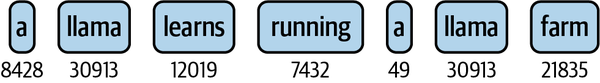



2. **Character-level**: cada letra = 1 token (sequências muito longas)
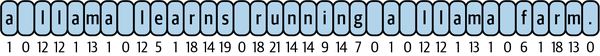







3. **Subword** (mais usado): pedaços de palavras = tokens (equilíbrio ideal)
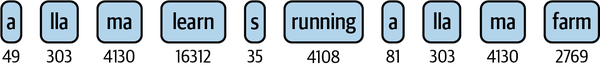



In [ ]:
# EXEMPLO 1: Tokenização com GPT-2 (modelo pequeno e rápido)


# Passo 1: Carregar o tokenizador do GPT-2
# utilizar a classe que sabe como dividir texto em tokens

print("---> Tokenizador carregado!\n")

# Passo 2: Texto de exemplo
#texto = "Olá! Como você está hoje?"
#texto = "Ola! Como voce esta hoje?"
#texto = "ola! como voce esta hoje?"
texto = "estava escuro e tempestuoso"
#texto = "O gato dorme no sofá"
#texto = "Hello! How are you today?"
print(f"Texto original: {texto}\n")

# Passo 3: Converter texto em tokens (IDs numéricos)
# Transformar cada pedaço do texto em um número

print(f"Tokens (IDs): {tokens}")
print(f"Quantidade de tokens: {len(tokens)}\n")

# Passo 4: Ver como cada token foi dividido
# Mostrar os pedaços de texto

print("Divisão em tokens:")
for i, (token_id, token_texto) in enumerate(zip(tokens, tokens_texto)):
    print(f"  {i+1}. '{token_texto}' → ID {token_id}")

# Passo 5: Converter de volta para texto
# Reconstruir o texto original a partir dos IDs

print(f"\nTexto reconstruído: {texto_reconstruido}")

In [ ]:
# Exercicio 1: Descubra como o tokenizador Qwen lida com uma frase.
# Primeiro, usaremos a biblioteca transformers para carregar o tokenizador correspondente.
# Carregar os tokenizadors:
# GPT-2 "openai-community/gpt2"
# Qwen "Qwen/Qwen2-0.5B"
# SmolLM "HuggingFaceTB/SmolLM-135M"
# e imprimir os ID Tokens e os Tokens.



#prompt = "Olá! Como você está hoje?"
prompt = "It was a dark and stormy"


#for t in input_ids:
#    print(t, "\t:", x)

## ANÁLISE DE PROBABILIDADES - Entendendo as Decisões do Modelo

Podemos examinar as probabilidades que o modelo atribui a cada token para entender como ele "pensa".

**O que veremos:**
- Distribuição de probabilidades para próximo token
- Tokens mais prováveis e suas chances
- Como temperatura modifica essas probabilidades* *(este exemplo estara na parte de temperatura)*

In [1]:
# Importa o PyTorch, que será usado para tensores e operações numéricas
import torch

# Importa a classe de modelo causal (gera próximo token olhando para a esquerda)
from transformers import AutoModelForCausalLM

# Importa o tokenizador correspondente ao modelo
from transformers import AutoTokenizer

# -----------------------------------------------------------------------------------
# Escolha do modelo
# (comentários: deixei exemplos de identificadores de modelos no Hub do Hugging Face)
# "openai-community/gpt2"  -> GPT-2 pequeno (inglês)
# "Qwen/Qwen2-0.5B"        -> Qwen 2 (0.5B de parâmetros), pequeno e rápido
# "HuggingFaceTB/SmolLM-135M" -> SmolLM (bem pequeno)
# -----------------------------------------------------------------------------------

# Prompt de entrada: texto que servirá de contexto para o modelo prever o próximo token
prompt = "It was a dark and stormy"

# Baixa/carrega o tokenizador do modelo escolhido (Qwen2-0.5B).
# O tokenizador converte texto -> IDs inteiros (tokens)
tokenizer = AutoTokenizer.from_pretrained("Qwen/Qwen2-0.5B")

# Tokeniza o prompt em uma primeira forma "simples", retornando um objeto com .input_ids (lista de ints).
# Aqui NÃO pedimos tensores do PyTorch ainda; apenas para ver os IDs crus.
input_ids = tokenizer(prompt).input_ids

# Exibir a lista de IDs de tokens (se estiver num notebook/REPL, a última linha imprime o valor)
input_ids

# Carrega o modelo causal pré-treinado correspondente (pesos + arquitetura)
# Por padrão, ele vem em modo de treino=False, mas é boa prática chamar model.eval() (ver dica abaixo)
model = AutoModelForCausalLM.from_pretrained("Qwen/Qwen2-0.5B")

# Agora tokenizamos de novo, mas pedindo tensores do PyTorch (return_tensors="pt"),
# pois o modelo espera tensores e não listas Python.
# O shape resultante será [batch_size=1, seq_len], por ex. [1, 6]
input_ids = tokenizer(prompt, return_tensors="pt").input_ids

# Faz um forward pass no modelo: entra com os IDs e recebe logits (pontuações não normalizadas)
# "outputs" é um objeto que contém .logits com shape [batch, seq_len, vocab_size]
# Cada posição da sequência tem um vetor de tamanho vocab_size com as pontuações para o PRÓXIMO token
outputs = model(input_ids)

# Olha o shape dos logits para confirmar a dimensão:
# batch_size x seq_len x vocab_size (ex.: [1, 6, 151936], depende do vocabulário do modelo)
outputs.logits.shape  # Um vetor de saída (logits) para cada token de entrada

# Pega apenas os logits da ÚLTIMA posição da sequência (o "próximo token" após o prompt)
# .logits[0, -1] -> primeiro item do batch, última posição da sequência
final_logits = model(input_ids).logits[0, -1]  # Os logits do próximo token

# Argmax retorna o índice (ID do token) com a maior pontuação entre os possíveis próximos tokens
final_logits.argmax()  # A posição (ID) do token mais provável

# Converte o ID (inteiro) de volta para string/token legível
# Observação: isso decodifica um ÚNICO token, que pode aparecer como um pedaço de palavra
tokenizer.decode(final_logits.argmax())

# Pega o TOP-10 dos logits (os 10 tokens mais prováveis) e imprime cada um decodificado
top10_logits = torch.topk(final_logits, 10)  # retorna valores e índices (IDs dos tokens)
for index in top10_logits.indices:
    # Decodifica cada ID para ver o texto correspondente ao token
    print(tokenizer.decode(index))


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/661 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/988M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/138 [00:00<?, ?B/s]

 night
 evening
 day
 morning
 winter
 afternoon
 Saturday
 Sunday
 Friday
 October


## EMBEDDINGS - Representando Palavras como Números

**Embeddings** são representações numéricas (vetores) de palavras que capturam seu significado.

**Conceito-chave:**
- Cada palavra vira um vetor de números (ex: 100 dimensões)
- Palavras similares têm vetores similares.
- Permite matemática com palavras: "rei" - "homem" + "mulher" ≈ "rainha"
- Vector Embedding é um sistema de coordenadas cartesianas.
- Cada dimensão do embedding é como um eixo (v₁, v₂, v₃, ..., vₙ).
- O embedding é o vetor de coordenadas reais que o modelo aprendeu para representar esse token.

**Como funciona:**
- O modelo aprende esses vetores durante o treinamento
- Palavras que aparecem em contextos similares ficam próximas
- A distância entre vetores indica similaridade semântica

**Por que usar embeddings (e não só IDs)?**
IDs não carregam significado — são só números inteiros.
Embeddings carregam relações semânticas.
No espaço vetorial:

- “dog” e “cat” ficam próximos → animais.
- “dog” e “car” ficam distantes → conceitos diferentes.
- “king - man + woman ≈ queen” (analogia clássica).

**Distâncias (cosine similarity)**:

- similaridade(dog, cat)  ≈ 0.9   (muito próximos)
- similaridade(dog, car)  ≈ 0.1   (bem distantes)

**Sistemas de coordenadas cartesianas - 2 dimension**


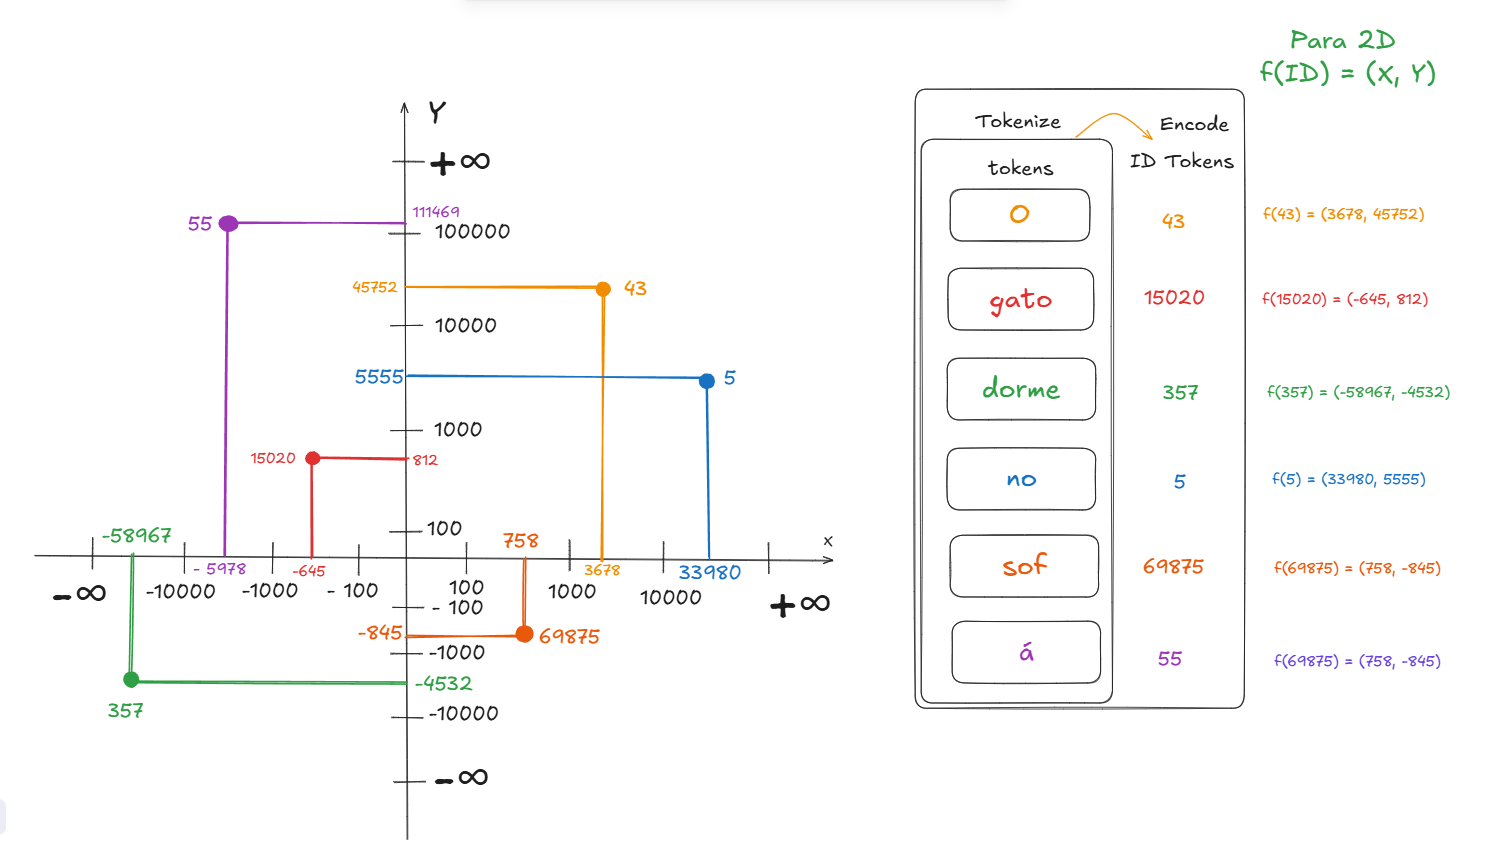



In [1]:
# Importa as bibliotecas necessárias do ecossistema Hugging Face e PyTorch
from transformers import AutoTokenizer, AutoModel   # para carregar o modelo e o tokenizador
import torch                                        # base numérica (tensores)
import torch.nn.functional as F                     # funções úteis (normalização, similaridade, etc.)


# Carrega o tokenizador e o modelo de embeddings (Sentence-Transformers)
tok = AutoTokenizer.from_pretrained("sentence-transformers/all-MiniLM-L6-v2")
mdl = AutoModel.from_pretrained("sentence-transformers/all-MiniLM-L6-v2")


# Define as frases (ou tokens) que queremos transformar em embeddings
texts = ["dog", "cat", "car"]


# tokenização e vetorização
# Tokeniza (converte texto → IDs) e cria tensores PyTorch
encoded = tok(texts, padding=True, truncation=True, return_tensors="pt")
# Desliga o cálculo de gradiente (modo inferência, mais rápido e leve)
with torch.no_grad():
    model_output = mdl(**encoded)
    # Extrai o último estado oculto (hidden state) e faz média sobre os tokens
    embeddings = F.normalize(model_output.last_hidden_state.mean(dim=1), p=2, dim=1)

print(embeddings.shape)   # -> torch.Size([3, 384])
print(embeddings)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

torch.Size([3, 384])
tensor([[-0.0531,  0.0142,  0.0071,  ...,  0.0299,  0.0239,  0.1101],
        [ 0.0373,  0.0512, -0.0003,  ...,  0.0613,  0.0608,  0.0493],
        [-0.0333,  0.1058,  0.0189,  ...,  0.0529,  0.0299,  0.0861]])


In [6]:
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 21.0 MB/s eta 0:00:00


In [27]:
# EXEMPLO EMBEDDING: Criando embeddings com Word2Vec (modelo clássico e leve)
from gensim.models import Word2Vec
import numpy as np

# Passo 1: Criar um corpus (conjunto de frases) para treinar
# Cada frase é uma lista de palavras
corpus = [
    ['gato', 'é', 'um', 'animal', 'doméstico'],
    ['cachorro', 'é', 'um', 'animal', 'doméstico'],
    ['gato', 'e', 'cachorro', 'são', 'pets'],
    ['animal', 'de', 'estimação', 'precisa', 'de', 'cuidados'],
    ['python', 'é', 'uma', 'linguagem', 'de', 'programação'],
    ['java', 'é', 'uma', 'linguagem', 'de', 'programação'],
    ['programação', 'requer', 'lógica', 'e', 'prática'],
    ['carro', 'é', 'um', 'veículo', 'automotor'],
    ['moto', 'também', 'é', 'um', 'veículo'],
    # ['gato', 'come', 'ração', 'e', 'dorme', 'no', 'sofá'],
    # ['cachorro', 'late', 'e', 'corre', 'pelo', 'parque'],
    # ['gato', 'e', 'cachorro', 'são', 'animais', 'de', 'estimação'],
    # ['animais', 'domésticos', 'vivem', 'com', 'pessoas'],
]

print(f"Corpus com {len(corpus)} frases criado!\n")

# Passo 2: Treinar o modelo Word2Vec
# vector_size=50: cada palavra será representada por 50 números
# window=3: considera 3 palavras antes e 3 depois para contexto
# min_count=1: inclui palavras que aparecem pelo menos 1 vez
# sg=1: usa Skip-gram (prediz contexto a partir da palavra)
modelo_w2v = Word2Vec(
    sentences=corpus,
    vector_size=50,
    window=3,
    min_count=1,
    sg=1,
    #epochs=500  # treina por 500 iterações
    epochs=100  # treina por 100 iterações
)

print("Modelo Word2Vec treinado!\n")

# Passo 3: Obter o vetor (embedding) de uma palavra
vetor_gato = modelo_w2v.wv['gato']
print(f"Embedding da palavra 'gato':")
print(f"  Dimensões: {vetor_gato.shape}")
print(f"  Primeiros 10 valores: {vetor_gato[:10]}\n")

Corpus com 9 frases criado!

Modelo Word2Vec treinado!

Embedding da palavra 'gato':
  Dimensões: (50,)
  Primeiros 10 valores: [ 0.00531759 -0.01690067  0.01592408  0.01721286 -0.01927322  0.00435676
  0.02003042 -0.01493637 -0.01462254 -0.01582147]



In [28]:
# EXEMPLO EMBEDDING: Calculando similaridade entre palavras

# Passo 1: Definir pares de palavras para comparar
pares = [
    ('gato', 'cachorro'),     # animais domésticos
    ('python', 'java'),       # linguagens de programação
    ('carro', 'moto'),        # veículos
    ('gato', 'python'),       # animal vs linguagem (não relacionados)
    ('gato', 'carro'),       # animal vs veículo (não relacionados)
]

# pares = [
#     ('cat', 'dog'),
#     ('python', 'java'),
#     ('car', 'motorcycle'),
#     ('cat', 'python'),
#     ('cat', 'car')
# ]


print("Similaridade entre palavras (0 = diferentes, 1 = idênticas):\n")

for palavra1, palavra2 in pares:
    # similarity() calcula o cosseno do ângulo entre os vetores
    # Valores próximos de 1 = palavras similares
    # Valores próximos de 0 ou negativos = palavras diferentes
    similaridade = modelo_w2v.wv.similarity(palavra1, palavra2)
    print(f"  '{palavra1}' ↔ '{palavra2}': {similaridade:.3f}")

print("\nObserve que palavras relacionadas têm maior similaridade!")

Similaridade entre palavras (0 = diferentes, 1 = idênticas):

  'gato' ↔ 'cachorro': 0.095
  'python' ↔ 'java': -0.057
  'carro' ↔ 'moto': -0.154
  'gato' ↔ 'python': 0.127
  'gato' ↔ 'carro': -0.020

Observe que palavras relacionadas têm maior similaridade!


In [29]:
# EXEMPLO EMBEDDING: Encontrando palavras similares

# most_similar() encontra as palavras com vetores mais próximos
# topn=3: mostra as 3 palavras mais similares
palavra_busca = 'gato'
similares = modelo_w2v.wv.most_similar(palavra_busca, topn=3)

print(f"Palavras mais similares a '{palavra_busca}':\n")
for palavra, score in similares:
    print(f"  {palavra}: {score:.3f}")

Palavras mais similares a 'gato':

  automotor: 0.546
  estimação: 0.325
  prática: 0.239


**Por que isso é importante para LLMs:**
- Embeddings são a primeira camada de qualquer LLM
- Permitem que o modelo "entenda" relações semânticas
- Em LLMs modernos, os embeddings são muito maiores (768, 1024, 4096 dimensões)

In [31]:
##Exercicio GERANDO TEXTO - O que devemos inserir para fazer funcionar o modelo?


# Gerar texto (a inferência do modelo)
output_ids = model.generate(input_ids, max_new_tokens=20)
# Decodificar os tokens de volta para texto
decoded_text = tokenizer.decode(output_ids[0])

print("Input IDs", input_ids[0])
print("Output IDs", output_ids)
print(f"Generated text: {decoded_text}")

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/661 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/988M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/138 [00:00<?, ?B/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


Input IDs tensor([   36,   956, 10608,   902,   632,  1531, 53535,   384,  1562, 29123,
           84, 11983,    11, 29705])
Output IDs tensor([[   36,   956, 10608,   902,   632,  1531, 53535,   384,  1562, 29123,
            84, 11983,    11, 29705,   297, 10378,    78,   511,  1974,   685,
           409, 21791, 41308,   384,   297,  2048,   511,  1531, 22390,  2907,
            13,   362, 55084, 77800]])
Generated text: Era uma noite escura e tempestuosa, quando o vento se movia de forma irregular e o sol se esgotava. A cidade estava


In [32]:
beam_output = model.generate(
    input_ids,
    num_beams=5,
    max_new_tokens=30,
)

print(tokenizer.decode(beam_output[0]))

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.


Era uma noite escura e tempestuosa, quando o vento se acendeu e a chuva se espalhou por todo o território. O céu se abriu e


## ATTENTION MECHANISM - O Coração dos Transformers

**Attention (Atenção)** é o mecanismo que permite ao modelo decidir quais partes do texto são mais importantes para entender cada palavra.

**Analogia:**
Quando você lê "*O gato subiu na árvore porque ele tinha medo*", você sabe que "`ele`" se refere a "*gato*". O attention faz isso automaticamente!

- Mecanismo de **atenção**
    - Vetor de Consulta/**Query** (**Q**)
        - O que estou procurando?
        - Representa o estado atual do decodificador em cada etapa da decodificação.
        - Contexto: pode ser considerado como a pessoa que busca informações para criar um resumo de um livro.
    - Vetor Chave/**Key** (**K**)
        - O que eu tenho disponível?
        - Representa token anterior.
        - Contexto: Se cada token anterior for uma página do livro, cada vetor-chave será como o número da página.
    - Vetor de Valor/**Value** (**V**)
        - Qual informação eu carrego?
        - Representa o valor real de um token anterior, conforme aprendido pelo modelo.
        - Contexto: Cada vetor de valor é como o conteúdo da página.
    -

  $$ Attention(Q, K, V) = softmax \left( \frac{Q K^{T}}{\sqrt{d_k}} \right) V  $$

- Q × K^T: calcula compatibilidade entre palavras
- $\sqrt{d_k}$: Fator de escalonamento para normalizar estabilidade numérica
- softmax: converte em probabilidades (soma = 1)
- × V: aplica os pesos aos valores

### Comparativo de Arquiteturas Transformer

A tabela abaixo resume as diferenças entre as três principais arquiteturas
de modelos baseados em Transformer:

| Tipo | Estrutura | Direção da Atenção | Exemplo | Tarefas Ideais | Melhor Para | Exemplos Bancários |
|------|-----------|-------------------|---------|----------------|-------------|-------------------|
| **Encoder-only** | Apenas encoder | Bidirecional<br>(lê todo contexto) | **BERT**, **RoBERTa**, **DistilBERT** | Classificação,<br>NER,<br>Embeddings,<br>Análise de sentimento | **Entender e classificar** <br>textos existentes sem<br>gerar novo conteúdo | • Classificar solicitações (empréstimo, cartão)<br>• Detectar fraudes<br>• Extrair entidades (CPF, CNPJ, valores)<br>• Análise de sentimento<br>• Similaridade de contratos<br>• Categorizar tickets<br>• Identificar risco de crédito |
| **Decoder-only** | Apenas decoder | Causal/<br>Unidirecional<br>(esquerda → direita) | **GPT-3/4**, **Mistral**, **LLaMA**, **Claude** | Chat,<br>Geração livre,<br>Raciocínio,<br>Completar texto | **Gerar conteúdo novo** <br>e manter conversas<br>naturais | • Chatbot de atendimento<br>• Gerar emails personalizados<br>• Criar descrições de produtos financeiros<br>• Assistente virtual para consultores<br>• Sugestões de investimento<br>• Completar formulários<br>• Explicar termos complexos<br>• Relatórios narrativos |
| **Encoder-Decoder** | Encoder +<br>Decoder | Encoder =<br>bidirecional<br>Decoder = causal +<br>cross-attention | **T5**, **FLAN-T5**, **BART**, **mBART** | Tradução,<br>Resumo,<br>Reescrita,<br>Transformação,<br>entrada→saída,<br>QA | **Transformar** uma <br> entrada estruturada <br> em saída específica | • Sistema de FAQ (pergunta → resposta)<br>• Resumir extratos bancários<br>• Traduzir contratos<br>• Converter dados em relatórios narrativos<br>• Simplificar termos técnicos<br>• Gerar notificações<br>• Reformular políticas |


In [ ]:
# ===============================================================
# EXEMPLO 1: IMPLEMENTANDO SELF-ATTENTION SIMPLIFICADO
# ===============================================================
# Este exemplo mostra a base do mecanismo de Self-Attention.
# A ideia é entender como Q (Query), K (Key) e V (Value) são criados
# e usados para calcular "quanto uma palavra presta atenção nas outras".
# ===============================================================

# ---------------------------------------------------------------
# Importa as bibliotecas principais do PyTorch
# ---------------------------------------------------------------
import torch
import torch.nn.functional as F  # funções matemáticas (ex: softmax)

# Passo 1: Criar dados de exemplo
# Imagine que temos uma frase com 4 palavras, cada uma representada por 8 números
# Shape: (1 frase, 4 palavras, 8 dimensões)
sequencia_len = 4  # 4 palavras
embedding_dim = 8  # cada palavra tem 8 números

# torch.randn cria números aleatórios (simulando embeddings)
embeddings = torch.randn(1, sequencia_len, embedding_dim)

print(f"Embeddings da frase:")
print(f"  Shape: {embeddings.shape}")
print(f"  [batch_size=1, sequência=4 palavras, dimensões=8]\n")

# Passo 2: No self-attention, Q, K e V são todas derivadas do mesmo input
# Por simplicidade, vamos usar os mesmos embeddings
query = embeddings   # "O que estou procurando?"
key = embeddings     # "O que posso oferecer?"
value = embeddings   # "Qual informação carrego?"

print("Query, Key e Value criados (todos iguais neste exemplo simplificado)\n")


Embeddings da frase:
  Shape: torch.Size([1, 4, 8])
  [batch_size=1, sequência=4 palavras, dimensões=8]

Query, Key e Value criados (todos iguais neste exemplo simplificado)



In [ ]:
# EXEMPLO 2: Calculando Attention Step-by-Step

# PASSO 1: Calcular scores de atenção (Q × K^T)
# matmul = multiplicação de matrizes
# transpose(-2, -1) = transpõe as últimas duas dimensões
scores = torch.matmul(query, key.transpose(-2, -1))

print("PASSO 1: Scores de Atenção (Q × K^T)")
print(f"  Shape: {scores.shape}")
print(f"  [batch=1, 4 queries, 4 keys]")
print(f"\n  Matriz de scores:")
print(f"  {scores[0]}")
print("\n  Cada linha mostra quanto cada palavra 'presta atenção' nas outras\n")

# PASSO 2: Normalizar com √d (scaling)
# Evita que números fiquem muito grandes
d_k = query.size(-1)  # dimensão = 8
scores_scaled = scores / torch.sqrt(torch.tensor(d_k, dtype=torch.float32))

print(f"PASSO 2: Scores Normalizados (dividido por √{d_k})")
print(f"  {scores_scaled[0]}\n")

# PASSO 3: Aplicar softmax (converter em probabilidades)
# softmax garante que cada linha some 1.0
attention_weights = F.softmax(scores_scaled, dim=-1)

print("PASSO 3: Pesos de Atenção (após softmax)")
print(f"  Shape: {attention_weights.shape}")
print(f"\n  Matriz de pesos:")
print(f"  {attention_weights[0]}")
print(f"\n  Cada linha agora soma 1.0 (são probabilidades!)")
print(f"  Soma da primeira linha: {attention_weights[0][0].sum():.4f}\n")

# PASSO 4: Aplicar pesos aos values (Attention × V)
# Aqui acontece a "mistura" da informação
output = torch.matmul(attention_weights, value)

print("PASSO 4: Output Final (Attention × V)")
print(f"  Shape: {output.shape}")
print(f"  [batch=1, 4 palavras, 8 dimensões]")
print(f"\n  Cada palavra agora contém informação de todas as outras,")
print(f"    ponderada pelos pesos de atenção!")

PASSO 1: Scores de Atenção (Q × K^T)
  Shape: torch.Size([1, 4, 4])
  [batch=1, 4 queries, 4 keys]

  Matriz de scores:
  tensor([[10.5188, -5.7287,  5.2953, -3.2422],
        [-5.7287,  6.7523, -2.0865, -0.1831],
        [ 5.2953, -2.0865, 18.1046, -3.7524],
        [-3.2422, -0.1831, -3.7524,  7.9969]])

  Cada linha mostra quanto cada palavra 'presta atenção' nas outras

PASSO 2: Scores Normalizados (dividido por √8)
  tensor([[ 3.7189, -2.0254,  1.8722, -1.1463],
        [-2.0254,  2.3873, -0.7377, -0.0647],
        [ 1.8722, -0.7377,  6.4010, -1.3267],
        [-1.1463, -0.0647, -1.3267,  2.8273]])

PASSO 3: Pesos de Atenção (após softmax)
  Shape: torch.Size([1, 4, 4])

  Matriz de pesos:
  tensor([[8.5569e-01, 2.7389e-03, 1.3498e-01, 6.5972e-03],
        [1.0613e-02, 8.7552e-01, 3.8468e-02, 7.5397e-02],
        [1.0665e-02, 7.8440e-04, 9.8811e-01, 4.3526e-04],
        [1.7253e-02, 5.0883e-02, 1.4405e-02, 9.1746e-01]])

  Cada linha agora soma 1.0 (são probabilidades!)
  Soma da 

## MULTI-HEAD ATTENTION & FEED-FORWARD


**Multi-Head Attention:**
- LLMs reais usam várias "cabeças" de atenção em paralelo
- Cada cabeça aprende padrões diferentes
- GPT-3 tem 96 cabeças!
- Cada um entende um tipo de relação entre as palavras.
- imagine que o robô tem vários olhos mágicos, cada um olha pra frase de um jeito diferente.

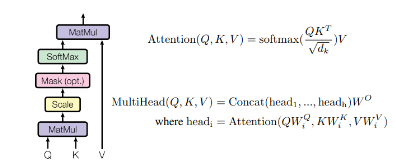

**Feed-Forward:**
- Essa reflexão é o feed-forward network:
  - uma mini-rede dentro do robô que pega o que a palavra sabe, faz contas, cria combinações novas e melhora o entendimento dela.
  - “pensar sozinho”
  -  é a hora de pensar individualmente depois da conversa.


**Diferença entre Self-Attention e Cross-Attention:**
- **Self-Attention**: Q, K, V vêm da mesma sequência (como fizemos acima)
- **Cross-Attention**: Q vem de uma sequência, K e V de outra (ex: tradução)



## Amostragem

LLMs geram texto prevendo a próxima palavra/token mais provável, um de cada vez.
Um modelo constrói suas saídas por meio de um processo conhecido como amostragem. Esta seção discute diferentes estratégias e variáveis ​​de amostragem, incluindo temperatura, top-k e top-p.

**Processo:**
1. Recebe o prompt: "O gato subiu"
2. Calcula probabilidades para próxima palavra: {"na": 0.4, "a": 0.3, "para": 0.2, ...}
3. Seleciona uma palavra baseado em estratégia de sampling
4. Adiciona ao texto: "O gato subiu na"
5. Repete até completar

**Parâmetros de Controle:**

**1. Temperature (0.0 - 2.0+)**
- **Baixa (0.1-0.5)**: Mais determinístico, sempre escolhe opções mais prováveis
- **Média (0.7-0.9)**: Balanceado, criativo mas coerente
- **Alta (1.0+)**: Muito aleatório, criativo mas pode ser incoerente

**2. Top-k (ex: 50)**
- Considera apenas as k palavras mais prováveis
- Descarta opções muito improváveis

**3. Top-p / Nucleus Sampling (ex: 0.9)**
- Considera palavras até acumular p% de probabilidade
- Adaptativo: mais opções para palavras comuns, menos para raras


In [ ]:
# EXERCICIO: Geração de Texto com GPT-2 (modelo pequeno - 124M parâmetros)
# Importa as classes necessárias da biblioteca Hugging Face Transformers

# -----------------------------------------------------------
# GPT2LMHeadModel:
#   → Modelo completo de linguagem pré-treinado para geração de texto.
#   → O sufixo "LMHead" indica que possui uma "Language Modeling Head",
#     ou seja, uma camada final que prevê o próximo token da sequência.
#
# GPT2Tokenizer:
#   → Responsável por converter texto em tokens numéricos (input_ids)
#     e também fazer o processo inverso (decodificação para texto).
# -----------------------------------------------------------

# Carrega o modelo GPT-2 base (124M parâmetros, o menor da família GPT-2)

# Carrega o tokenizer correspondente ao modelo GPT-2

# -----------------------------------------------------------
# Ajustes necessários no tokenizer
# -----------------------------------------------------------

# Alguns modelos, como o GPT-2, não possuem um token explícito de "padding".
# Aqui definimos o token de padding como sendo o mesmo do EOS (End Of Sentence),
# para evitar erros em tarefas que exigem preenchimento (ex: batch generation).


# -----------------------------------------------------------
# Coloca o modelo em modo de avaliação (inference mode)
# -----------------------------------------------------------
# O método eval() desativa camadas como dropout e normalizações
# usadas durante o treinamento, garantindo resultados determinísticos
# e evitando consumo desnecessário de memória de GPU.

print("Modelo carregado!\n")

Carregando modelo GPT-2 (pode demorar um pouco na primeira vez)...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Modelo carregado!



In [ ]:
# Continua: Geração com Diferentes Temperaturas

# Prompt de entrada — ponto de partida para a geração de texto
prompt = "Once upon a time, in a magical forest,"

print(f"Prompt: '{prompt}'\n")
print("="*70)

# -----------------------------------------------------------
# Lista de diferentes valores de temperatura a serem testados
# -----------------------------------------------------------
# A temperatura controla o "nível de criatividade" do modelo:
# - Valores baixos (ex: 0.3): modelo mais conservador e previsível.
# - Valores médios (ex: 0.7): equilíbrio entre coerência e diversidade.
# - Valores altos (ex: 1.2): mais criativo, mas pode gerar frases incoerentes.



# -----------------------------------------------------------
# Loop principal — testa a geração com cada valor de temperatura
# -----------------------------------------------------------
for temp in temperaturas:
    print(f"\n TEMPERATURE = {temp}")
    print("-" * 70)

    # -------------------------------------------------------
    # Passo 1: Converter o prompt em tokens numéricos
    # -------------------------------------------------------
    # O tokenizer transforma texto em IDs (números) compreensíveis pelo modelo.
    # return_tensors='pt' → retorna um tensor PyTorch em vez de uma lista normal.


    # -------------------------------------------------------
    # Passo 2: Geração de texto
    # -------------------------------------------------------
    # - max_new_tokens: número máximo de tokens que o modelo pode gerar.
    # - temperature: controla a aleatoriedade na escolha dos próximos tokens.
    # - do_sample=True: ativa o modo de amostragem probabilística
    #   (sem isso, o modelo sempre escolheria o token mais provável = greedy).
    # - pad_token_id: define o token usado para preenchimento (necessário em alguns modelos).
    with torch.no_grad():  # Desativa o cálculo de gradientes → mais rápido, pois não há treino.


     # -------------------------------------------------------
    # Passo 3: Decodificar os tokens de volta para texto
    # -------------------------------------------------------
    # O método decode() converte os IDs gerados novamente para palavras.
    # skip_special_tokens=True → remove tokens especiais como <PAD> ou <EOS>.


    print(f"{texto_gerado}")

print("\n" + "="*70)
print("\n Observe como temperatura afeta:")
print("  • Temperatura baixa: mais previsível e coerente")
print("  • Temperatura alta: mais criativo mas pode ser estranho")

The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


Prompt: 'Once upon a time, in a magical forest,'


 TEMPERATURE = 0.3
----------------------------------------------------------------------
Once upon a time, in a magical forest, the spirit of a man was born.

The spirit of a man was born.

The spirit of a man was born.

The spirit of a man was born.

The spirit of a man was born.



 TEMPERATURE = 0.7
----------------------------------------------------------------------
Once upon a time, in a magical forest, people must fight for their lives against an evil force. Each of the three types of monsters is named. The first one is the "Evil Giant". This is a giant who appears and attacks with a sharp blade. The other two are the "P

 TEMPERATURE = 1.2
----------------------------------------------------------------------
Once upon a time, in a magical forest, is there anything, with your soul, but no one can touch it?" I've told you, for a long time now. To me I was saying how I would return, whether to get to the grave or to get killed,

In [ ]:
# EXEMPLO: Comparando Top-k e Top-p

# Define o prompt inicial que servirá de entrada para o modelo
prompt = "The future of artificial intelligence is"

print(f"Prompt: '{prompt}'\n")
print("="*70)

# -------------------------------------------------------
# CONFIGURAÇÕES DE AMOSTRAGEM (SAMPLING STRATEGIES)
# -------------------------------------------------------
# Cada configuração define diferentes valores de top-k e top-p
# para comparar como eles influenciam o texto gerado.
configs = [
    {"nome": "Sem restrições", "top_k": 0, "top_p": 1.0},
    {"nome": "Top-k = 20", "top_k": 20, "top_p": 1.0},
    {"nome": "Top-p = 0.9", "top_k": 0, "top_p": 0.9},
    {"nome": "Top-k = 50 + Top-p = 0.95", "top_k": 50, "top_p": 0.95},
]

# -------------------------------------------------------
# LOOP PRINCIPAL: EXECUTA CADA CONFIGURAÇÃO
# -------------------------------------------------------
for config in configs:
    print(f"\n {config['nome']}")
    print("-" * 70)

    # Converte o texto de entrada (prompt) para IDs de tokens
    # return_tensors='pt' -> retorna tensor compatível com PyTorch


    # Desativa o cálculo de gradientes (otimização não é necessária na inferência)
    # top_k: considera apenas os k tokens mais prováveis
    # top_p: considera tokens até acumular p% de probabilidade
    # Gera texto com base no prompt e nas configurações de sampling
    # Parametros:
        # tokens de entrada
        #    max_new_tokens=40,              # número máximo de tokens a serem gerados
        #    temperature=0.8,                # controla a aleatoriedade (0 = determinístico)
        #    do_sample=True,                 # ativa amostragem (sampling) em vez de greedy decoding
        #    top_k=config["top_k"] if config["top_k"] > 0 else None,  # top-k: considera apenas os k tokens mais prováveis
        #    top_p=config["top_p"],          # top-p: considera tokens até acumular p% de probabilidade
        #    pad_token_id=tokenizer_geracao.pad_token_id,  # define token de preenchimento (necessário em alguns modelos)
        #    num_return_sequences=1          # gera apenas uma sequência de texto


    # Decodifica o tensor de saída (tokens) de volta para texto legível
    print(f"{texto_gerado}")

# -------------------------------------------------------
# RESUMO FINAL DAS ESTRATÉGIAS TESTADAS
# -------------------------------------------------------
print("\n" + "="*70)
print("\n Estratégias de Sampling:")
print("  • Top-k: limita vocabulário a k opções mais prováveis")
print("  • Top-p: adaptativo, mais opções em contextos diversos")
print("  • Combinados: ainda mais controle sobre qualidade")

Prompt: 'The future of artificial intelligence is'


 Sem restrições
----------------------------------------------------------------------
The future of artificial intelligence is spent in research and development on a variety of different aspects of the machine learning community.

Discover more about how AI's future is unfolding in the video below.

View video on YouTube

 Top-k = 20
----------------------------------------------------------------------
The future of artificial intelligence is at stake, and AI is an important part of that," he said.

"AI will eventually replace humans as the most important, responsible, intelligent, effective and reliable means of managing our human

 Top-p = 0.9
----------------------------------------------------------------------
The future of artificial intelligence is a great deal more uncertain. Now, companies will have to figure out how to make good on that promise. They will have to understand how to make good on that promise. They will have

**Outras técnicas de geração:**
- **Greedy Decoding**: sempre escolhe o token mais provável (determinístico)
- **Beam Search**: mantém múltiplas sequências candidatas em paralelo
- **Nucleus Sampling**: outro nome para Top-p

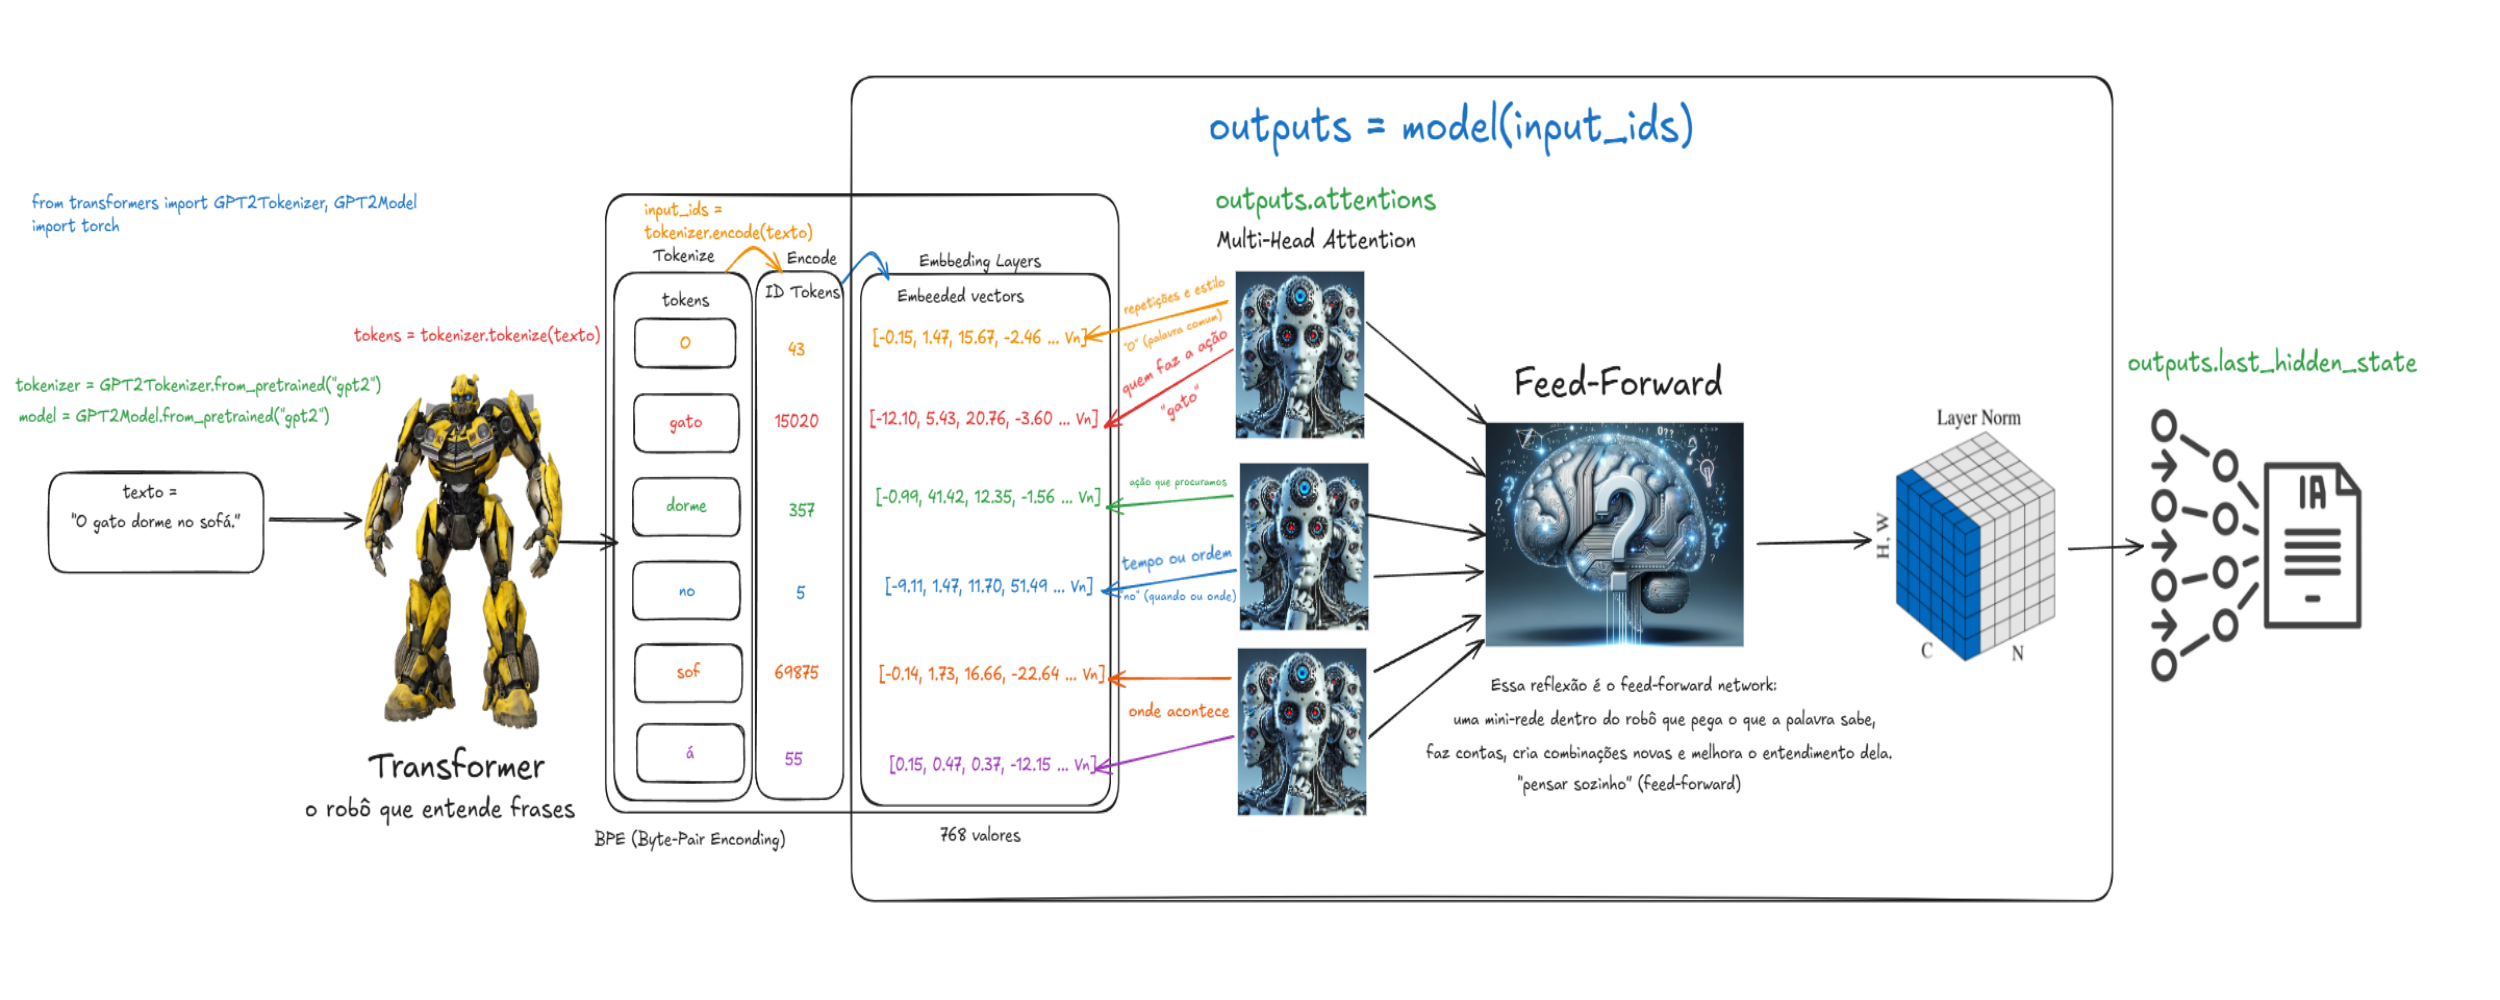

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# lê e aumenta o tamanho
img = cv2.imread("/content/transformers-flow.png")
resized = cv2.resize(img, (2500, 1000))   # aumenta bastante

cv2_imshow(resized)


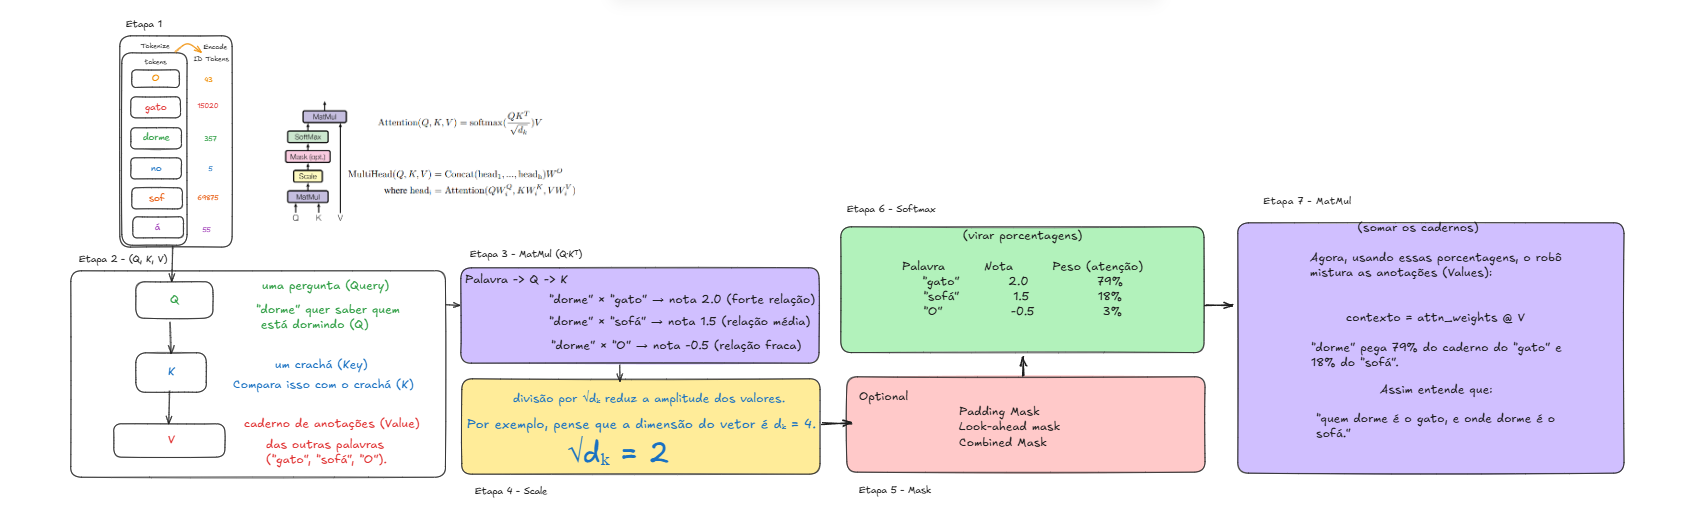

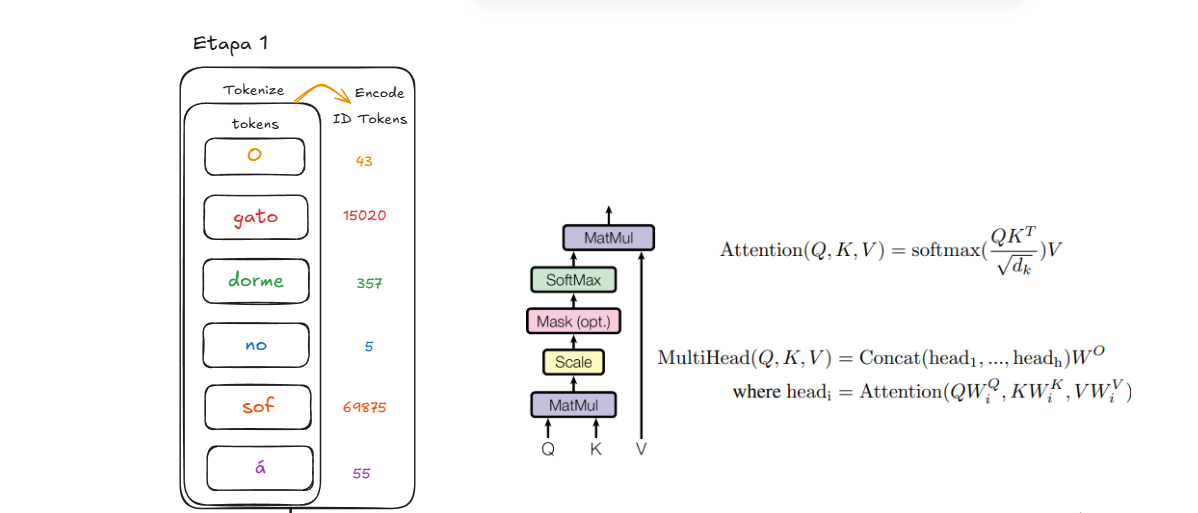

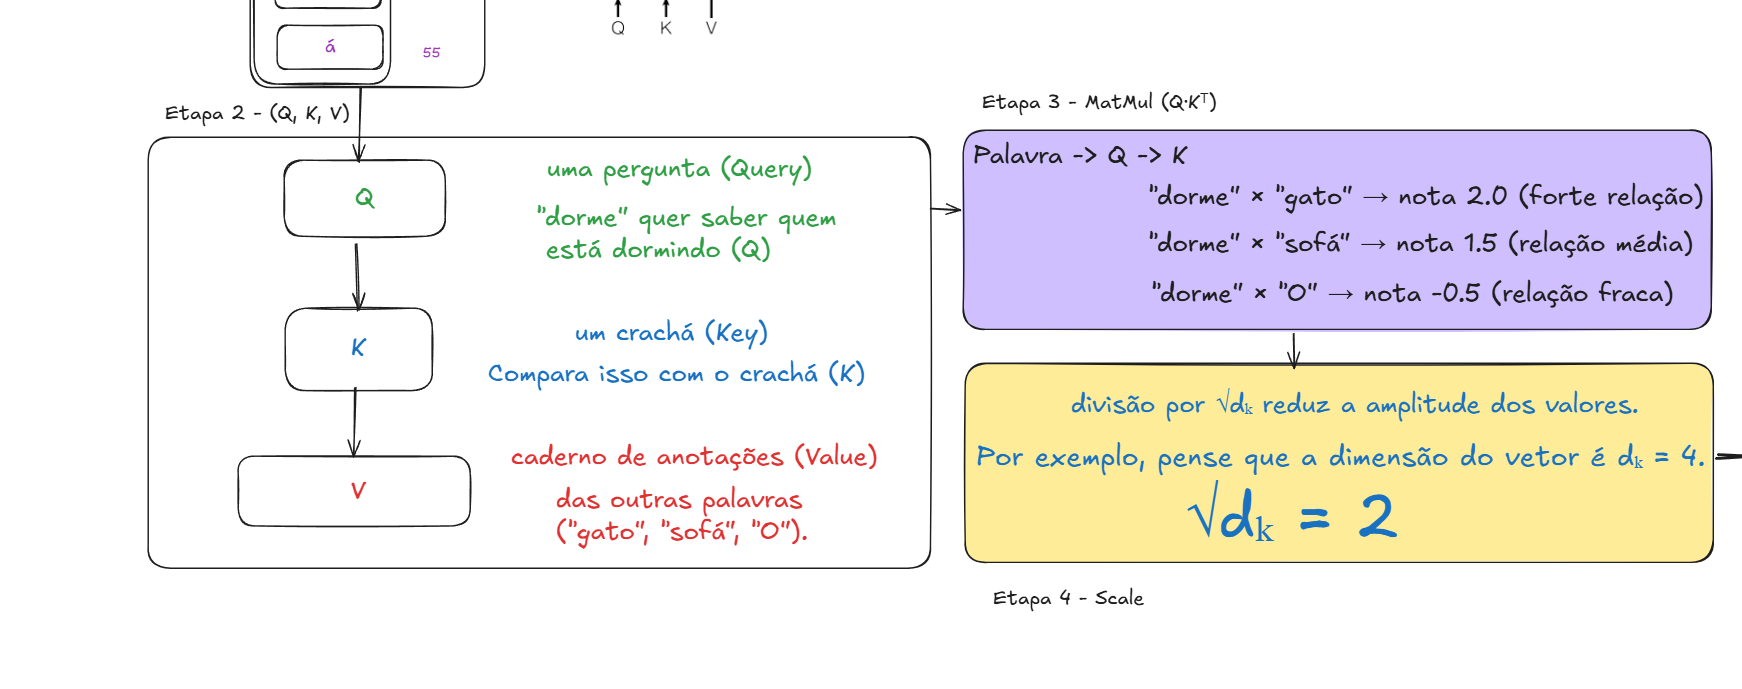

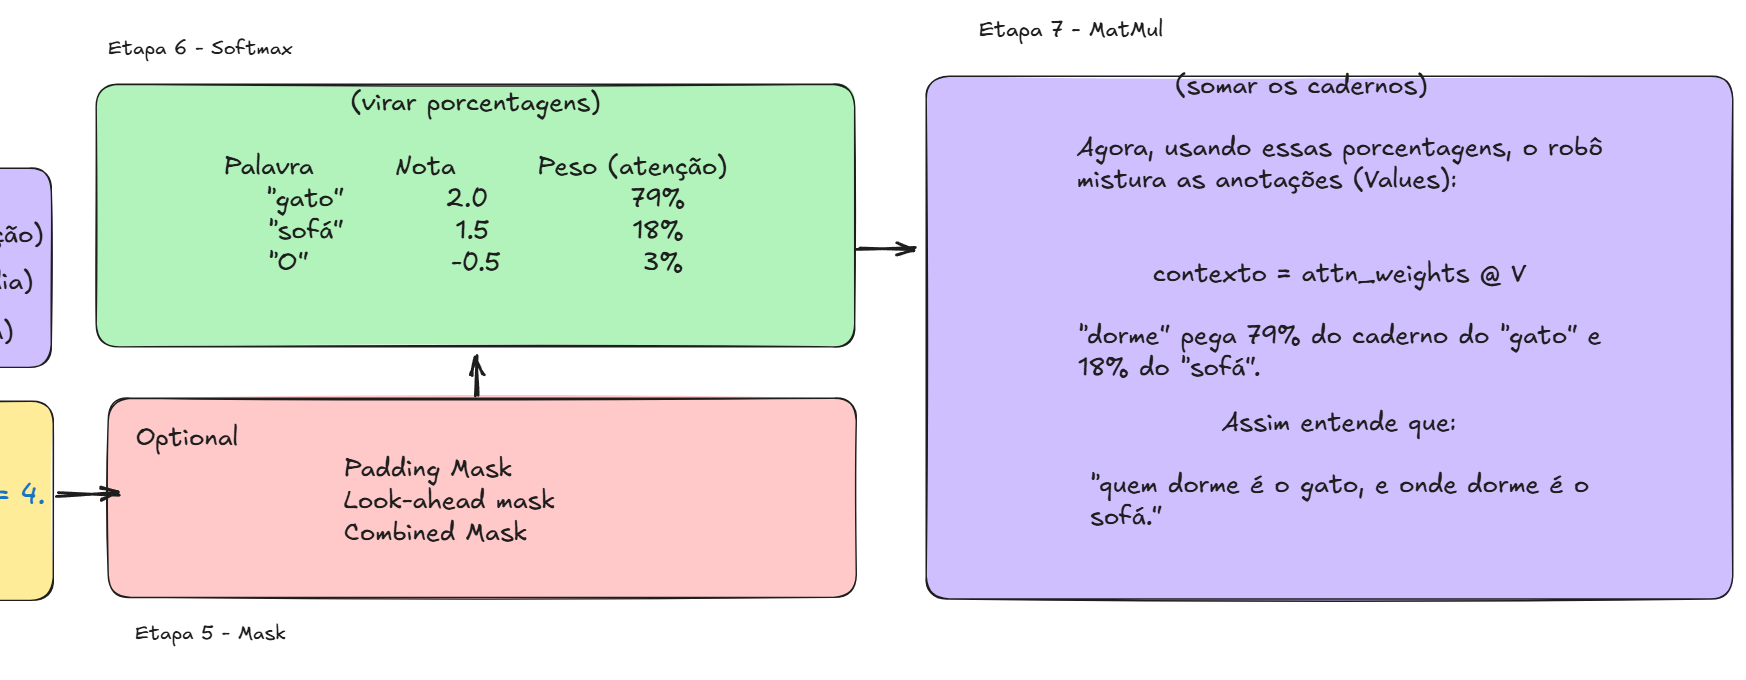

https://blog.eleuther.ai/transformer-math/
